In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

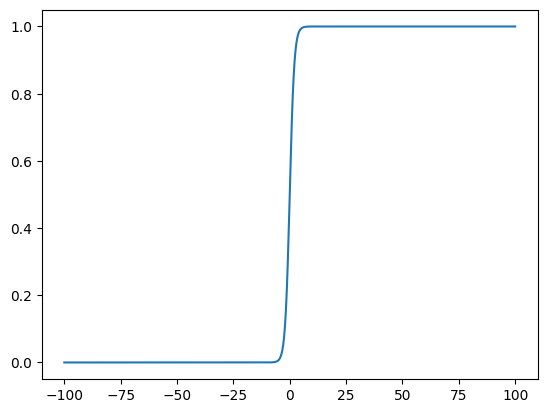

In [ ]:
x = np.linspace(-100,100,1000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.show();

In [ ]:
x = torch.randn(10)
print(x)
print(x.size())

tensor([-0.5809, -0.8041,  0.0707, -1.5548, -1.4326,  0.0105,  1.0765,  0.6528,
         1.1570, -0.4118])
torch.Size([10])


In [ ]:
torch.randn(2,3)

tensor([[ 0.8148,  1.7985, -1.7515],
        [-0.4764, -0.4081, -0.2508]])

In [ ]:
torch.randn(2,3,2).size()

torch.Size([2, 3, 2])

In [ ]:
x = torch.Tensor([[1,2,3],[4,5,6]])
print(x)

x = x.view(1,-1)
y = x.reshape(1,-1)
print(x, y)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3., 4., 5., 6.]]) tensor([[1., 2., 3., 4., 5., 6.]])


In [ ]:
arr = torch.Tensor([[10,20,40],[80,60, 70]])
arr

tensor([[10., 20., 40.],
        [80., 60., 70.]])

In [ ]:
arr.topk(k = 1, dim = 1)

torch.return_types.topk(
values=tensor([[40.],
        [80.]]),
indices=tensor([[2],
        [0]]))

In [ ]:
x = torch.Tensor([[1,2], [3,4]])
###multiply each element by 2
x.mul_(2)
print(x)

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
2 *x

tensor([[ 4.,  8.],
        [12., 16.]])

In [ ]:
x

tensor([[2., 4.],
        [6., 8.]])

In [ ]:
### To check if GPU instance is vailable in you system or not
torch.cuda.is_available()

True

In [ ]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

import time
start = time.time()
a.matmul(b)
end = time.time()
print("{} seconds".format(end - start))

14.890361547470093 seconds


In [ ]:
a = a.cuda()
b = b.cuda()

start = time.time()
a.matmul(b)
end = time.time()
print("{} seconds".format(end - start))

0.11280012130737305 seconds


In [ ]:
from torchvision import datasets
from torchvision import transforms
trainset = datasets.MNIST(root='./data',  train=True, transform=transforms.ToTensor(),download=True)
testset = datasets.MNIST(root='./data',  train=False, transform=transforms.ToTensor(),download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.07MB/s]


In [ ]:
print(trainset.data.shape)
print(testset.data.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
testloader.dataset.data.shape

torch.Size([10000, 28, 28])

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


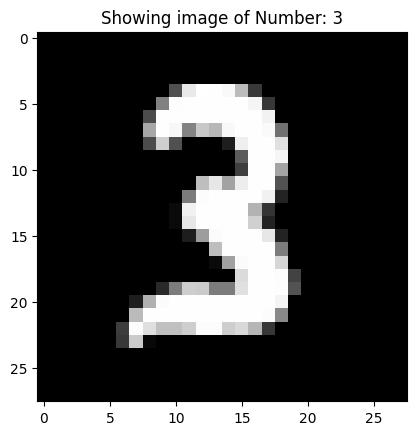

In [ ]:
import matplotlib.pyplot as plt
data_iter = iter(trainloader)
images, labels = next(data_iter)

print(type(images))   ### <class 'torch.Tensor'>
print(images.shape)  ### torch.Size([64, 1, 28, 28])
print(labels.shape)  ### torch.Size([64])

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')
plt.gca().set_title(f'Showing image of Number: {labels[1].item()}')
plt.show();

In [ ]:
from torch import nn
import torch
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)

  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x), dim=1)
    return x


In [ ]:
model = Network()

In [ ]:
print(model)

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
model.hidden1.weight.shape

torch.Size([128, 784])

In [ ]:
model.hidden1.bias.shape

torch.Size([128])

In [ ]:
with torch.no_grad():
  model.hidden1.bias.fill_(0)
  model.hidden1.weight.normal_(std=0.01)

In [ ]:
model.hidden1.weight

Parameter containing:
tensor([[-5.5001e-03, -1.5173e-02, -4.8594e-03,  ...,  1.8039e-02,
          1.1567e-02, -1.2483e-02],
        [-1.2358e-02,  1.1456e-03, -1.4197e-02,  ..., -1.4339e-02,
         -9.4371e-03,  1.6659e-03],
        [ 9.9673e-03,  8.4521e-03, -1.3284e-02,  ..., -5.5135e-03,
         -2.3364e-03, -5.7243e-03],
        ...,
        [-1.3652e-03, -5.1552e-03, -1.1524e-03,  ...,  7.2515e-03,
         -1.0760e-02,  8.9634e-03],
        [-8.6738e-04, -1.2969e-04, -3.0454e-02,  ..., -2.5313e-02,
         -7.4565e-04,  1.2449e-02],
        [ 2.2716e-03,  5.2957e-03, -7.4477e-03,  ...,  8.7011e-05,
          1.4546e-02,  1.6102e-02]], requires_grad=True)

In [ ]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

model=nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.Softmax(dim=1)
)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

In [ ]:
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [ ]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
images.resize_(images.shape[0], 1, 784)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
images.shape

torch.Size([64, 1, 784])

In [ ]:
images.resize_(images.shape[0],1,784)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
images.view(images.shape[0], -1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
images.shape

torch.Size([64, 1, 784])

In [ ]:
# Obtain images and labels from first batch
images, labels = next(iter(trainloader))
#Flatten the images
images.resize_(images.shape[0], 1, 784)
## Forward pass a image through the network after resizing
ps = model.forward(images[0,:])

In [ ]:
ps

tensor([[0.1087, 0.1125, 0.0933, 0.0953, 0.1043, 0.0875, 0.0938, 0.1036, 0.0978,
         0.1034]], grad_fn=<SoftmaxBackward0>)

In [ ]:
a = np.array(([1,2],[3,4]))

In [ ]:
torch.from_numpy(a)

tensor([[1, 2],
        [3, 4]])

In [ ]:
b

tensor([[0.7107, 0.5589, 0.5048,  ..., 0.3849, 0.0229, 0.0106],
        [0.2835, 0.6934, 0.3658,  ..., 0.7322, 0.4762, 0.7661],
        [0.9590, 0.7056, 0.9679,  ..., 0.6492, 0.9233, 0.4800],
        ...,
        [0.2361, 0.4912, 0.2216,  ..., 0.5179, 0.9375, 0.3410],
        [0.2458, 0.2468, 0.7743,  ..., 0.1099, 0.3793, 0.0504],
        [0.7714, 0.8345, 0.6176,  ..., 0.1856, 0.3120, 0.9476]],
       device='cuda:0')

In [ ]:
torch.cuda.is_available()

True

In [ ]:
c = torch.Tensor()

In [ ]:
c

tensor([])

In [ ]:
#Define the loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
images = images.view(images.shape[0], -1)

In [ ]:
logits = model(images)

In [ ]:
loss = criterion(logits, labels)

In [ ]:
loss.item()

2.303494691848755

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
)

In [ ]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [ ]:
logits = model(images)

In [ ]:
loss = criterion(logits, labels)
loss.item()

2.2997219562530518

In [ ]:
x = torch.randn(2,2, requires_grad=True)

In [ ]:
y = x**2
z = y.mean()

In [ ]:
x, y

(tensor([[ 2.7748, -1.5478],
         [-0.8335,  1.3663]], requires_grad=True),
 tensor([[7.6995, 2.3957],
         [0.6947, 1.8668]], grad_fn=<PowBackward0>))

In [ ]:
  z.backward()

In [ ]:
x.grad

tensor([[ 1.3874, -0.7739],
        [-0.4167,  0.6832]])

In [ ]:
import numpy as np

# Example: Gradient of a 1D array
x = np.array([1, 2, 4, 7, 11])
gradient = np.gradient(x)
print("Gradient:", gradient)


Gradient: [1.  1.5 2.5 3.5 4. ]


In [ ]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [ ]:
logits = model(images)
loss = criterion(logits, labels)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
print('Before backprop: \n',model[0].weight.grad)

Before backprop: 
 None


In [ ]:
loss.backward()

In [ ]:
print('After backprop: \n',model[0].weight.grad)

After backprop: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
model[0].weight.grad.shape

torch.Size([128, 784])

In [ ]:
model[2].weight.grad.shape

torch.Size([64, 128])

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [ ]:
optimizer.step()

In [ ]:
model[0].weight

Parameter containing:
tensor([[ 0.0299,  0.0138, -0.0212,  ..., -0.0021,  0.0336, -0.0276],
        [-0.0189,  0.0110, -0.0113,  ...,  0.0237, -0.0065, -0.0228],
        [ 0.0283, -0.0334,  0.0027,  ...,  0.0104,  0.0296,  0.0060],
        ...,
        [-0.0199,  0.0202, -0.0005,  ...,  0.0280,  0.0097,  0.0099],
        [-0.0062, -0.0039, -0.0211,  ...,  0.0053, -0.0023,  0.0213],
        [-0.0063,  0.0040,  0.0120,  ...,  0.0257,  0.0052, -0.0137]],
       requires_grad=True)

In [ ]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        ### Training pass
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.7300263320459233
Training loss: 0.5556469492947878
Training loss: 0.40043168273498253
Training loss: 0.3487223219325039
Training loss: 0.31693786601109036


In [ ]:
model[0].weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
for p in model.named_parameters():
  if 'weight' in p[0]:
    print(p[1].data)

tensor([[ 0.0299,  0.0138, -0.0212,  ..., -0.0021,  0.0336, -0.0276],
        [-0.0189,  0.0110, -0.0113,  ...,  0.0237, -0.0065, -0.0228],
        [ 0.0283, -0.0334,  0.0027,  ...,  0.0104,  0.0296,  0.0060],
        ...,
        [-0.0199,  0.0202, -0.0005,  ...,  0.0280,  0.0097,  0.0099],
        [-0.0062, -0.0039, -0.0211,  ...,  0.0053, -0.0023,  0.0213],
        [-0.0063,  0.0040,  0.0120,  ...,  0.0257,  0.0052, -0.0137]])
tensor([[ 0.0593,  0.1057,  0.0310,  ..., -0.0229, -0.0299,  0.0058],
        [-0.0048,  0.1328,  0.0084,  ...,  0.0358,  0.0392,  0.0158],
        [ 0.0159,  0.1407, -0.0312,  ...,  0.0065,  0.0473, -0.0666],
        ...,
        [-0.0646,  0.0914,  0.0095,  ...,  0.0734,  0.0539,  0.0795],
        [-0.0955, -0.0712, -0.0585,  ...,  0.1167, -0.0676, -0.0064],
        [ 0.0370,  0.0332,  0.0199,  ...,  0.0010, -0.0196,  0.0334]])
tensor([[ 0.2558, -0.1850, -0.1290,  0.1576,  0.1661,  0.0151,  0.0520, -0.1226,
         -0.1290,  0.2650,  0.1103,  0.0596,  0.011

In [ ]:
criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

tensor(0.2317, grad_fn=<NllLossBackward0>)


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

criterion = nn.NLLLoss()

In [ ]:
x = torch.randn(2,2,requires_grad=True)
print(x)

tensor([[ 0.0181, -0.9598],
        [ 0.3399,  1.8049]], requires_grad=True)


In [ ]:
y = x**2
z = y.mean()

print(y)
print(z)

tensor([[3.2844e-04, 9.2112e-01],
        [1.1550e-01, 3.2577e+00]], grad_fn=<PowBackward0>)
tensor(1.0737, grad_fn=<MeanBackward0>)


In [ ]:
z.backward()
print(x.grad)

tensor([[ 0.0091, -0.4799],
        [ 0.1699,  0.9025]])


In [ ]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [ ]:
logits = model(images)
loss = criterion(logits, labels)

In [ ]:
### print gradients of weights from the first layer
print('Before backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None


In [ ]:
loss.backward()

In [ ]:
print('After backward pass:' ,model[0].weight.grad)

After backward pass: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [ ]:
optimizer.step()

In [ ]:
print('Updated weights of first layer - ', model[0].weight)

Updated weights of first layer -  Parameter containing:
tensor([[ 0.0143,  0.0133,  0.0180,  ..., -0.0321, -0.0290,  0.0253],
        [-0.0056,  0.0062,  0.0059,  ...,  0.0044,  0.0148,  0.0202],
        [ 0.0217, -0.0091,  0.0209,  ..., -0.0236, -0.0048,  0.0114],
        ...,
        [ 0.0087, -0.0332, -0.0142,  ..., -0.0037, -0.0295,  0.0295],
        [ 0.0179,  0.0347, -0.0012,  ..., -0.0323,  0.0356, -0.0300],
        [ 0.0057,  0.0113,  0.0051,  ...,  0.0214, -0.0239, -0.0085]],
       requires_grad=True)


In [ ]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        ### Training pass
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8098177588951867
Training loss: 0.5968302382207883
Training loss: 0.40919957416398184
Training loss: 0.35410380427008753
Training loss: 0.3227765494619987


In [ ]:
model.state_dict()['0.weight']

tensor([[ 0.0143,  0.0133,  0.0180,  ..., -0.0321, -0.0290,  0.0253],
        [-0.0056,  0.0062,  0.0059,  ...,  0.0044,  0.0148,  0.0202],
        [ 0.0217, -0.0091,  0.0209,  ..., -0.0236, -0.0048,  0.0114],
        ...,
        [ 0.0087, -0.0332, -0.0142,  ..., -0.0037, -0.0295,  0.0295],
        [ 0.0179,  0.0347, -0.0012,  ..., -0.0323,  0.0356, -0.0300],
        [ 0.0057,  0.0113,  0.0051,  ...,  0.0214, -0.0239, -0.0085]])

In [ ]:
checkpoint = {'input_size': 784,
              'hidden_size': [128, 64],
              'output_size': 10,
              'state_dict': model.state_dict()}

In [ ]:
torch.save(checkpoint,'model.pth')

In [ ]:
checkpoint = torch.load('model.pth')

In [ ]:
checkpoint

{'input_size': 784,
 'hidden_size': [128, 64],
 'output_size': 10,
 'state_dict': OrderedDict([('0.weight',
               tensor([[ 0.0143,  0.0133,  0.0180,  ..., -0.0321, -0.0290,  0.0253],
                       [-0.0056,  0.0062,  0.0059,  ...,  0.0044,  0.0148,  0.0202],
                       [ 0.0217, -0.0091,  0.0209,  ..., -0.0236, -0.0048,  0.0114],
                       ...,
                       [ 0.0087, -0.0332, -0.0142,  ..., -0.0037, -0.0295,  0.0295],
                       [ 0.0179,  0.0347, -0.0012,  ..., -0.0323,  0.0356, -0.0300],
                       [ 0.0057,  0.0113,  0.0051,  ...,  0.0214, -0.0239, -0.0085]])),
              ('0.bias',
               tensor([-0.0201,  0.0101,  0.0164, -0.0184,  0.0335,  0.0797, -0.0338,  0.0088,
                       -0.0461,  0.0553,  0.0706,  0.0620,  0.0516,  0.0688,  0.0227, -0.0260,
                        0.0123,  0.0193, -0.0329, -0.0378,  0.0573,  0.0547,  0.0320,  0.0656,
                        0.0536,  0.0267, 

In [ ]:
model = nn.Sequential(OrderedDict([
                      ('0', nn.Linear(checkpoint["input_size"], checkpoint["hidden_size"][0])),
                      ('1', nn.ReLU()),
                      ('2', nn.Linear(checkpoint["hidden_size"][0], checkpoint["hidden_size"][1])),
                      ('3', nn.ReLU()),
                      ('4', nn.Linear(checkpoint["hidden_size"][1], checkpoint["output_size"]))]))

In [ ]:
model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [ ]:
accuracy = 0
optimizer.zero_grad()
for images, labels in testloader:
    images = images.view(images.shape[0], -1)
    probs = model(images)

    top_p, top_class = probs.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    print("Accuracy ",  (accuracy/len(testloader) * 100).item())

Accuracy  0.5871815085411072
Accuracy  1.1843153238296509
Accuracy  1.7615444660186768
Accuracy  2.3686306476593018
Accuracy  2.9558119773864746
Accuracy  3.5230889320373535
Accuracy  4.140127658843994
Accuracy  4.757165431976318
Accuracy  5.354299545288086
Accuracy  5.921576499938965
Accuracy  6.518710613250732
Accuracy  7.095939636230469
Accuracy  7.693073272705078
Accuracy  8.290206909179688
Accuracy  8.837579727172852
Accuracy  9.434713363647461
Accuracy  10.00199031829834
Accuracy  10.58917236328125
Accuracy  11.186305046081543
Accuracy  11.743630409240723
Accuracy  12.310908317565918
Accuracy  12.898089408874512
Accuracy  13.445462226867676
Accuracy  14.042594909667969
Accuracy  14.619824409484863
Accuracy  15.226910591125488
Accuracy  15.794187545776367
Accuracy  16.361465454101562
Accuracy  16.948646545410156
Accuracy  17.51592254638672
Accuracy  18.083200454711914
Accuracy  18.700239181518555
Accuracy  19.297372817993164
Accuracy  19.90445899963379
Accuracy  20.511545181274414